In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string as st
import re
import nltk
from nltk import PorterStemmer, WordNetLemmatizer
import matplotlib.pyplot as plt

In [2]:
# Read the data. Here it is already in .csv format.
data = pd.read_csv('SPAM_data.csv')
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
data.shape

(5572, 2)

# Text cleaning and processing steps-
* Remove punctuations
* Convert text to tokens
* Remove tokens of length less than or equal to 3
* Remove stopwords using NLTK corpus stopwords list to match
* Apply stemming
* Apply lemmatization
* Convert words to feature vectors

In [4]:
# Remove all punctuations from the text

def remove_punct(text):
    return ("".join([ch for ch in text if ch not in st.punctuation]))

In [5]:
data['removed_punc'] = data['Message'].apply(lambda x: remove_punct(x))
data.head()

,Category,Message,removed_punc
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...


In [6]:
''' Convert text to lower case tokens. Here, split() is applied on white-spaces. But, it could be applied
    on special characters, tabs or any other string based on which text is to be seperated into tokens.
'''
def tokenize(text):
    text = re.split('\s+' ,text)
    return [x.lower() for x in text]

In [7]:
data['tokens'] = data['removed_punc'].apply(lambda msg : tokenize(msg))
data.head()

,Category,Message,removed_punc,tokens
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,"[go, until, jurong, point, crazy, available, o..."
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f..."
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, t..."
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l..."


In [8]:
# Remove tokens of length less than 3
def remove_small_words(text):
    return [x for x in text if len(x) > 3 ]

In [9]:
data['larger_tokens'] = data['tokens'].apply(lambda x : remove_small_words(x))
data.head()

,Category,Message,removed_punc,tokens,larger_tokens
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,"[go, until, jurong, point, crazy, available, o...","[until, jurong, point, crazy, available, only,..."
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]",[joking]
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, wkly, comp, final, tkts, 21st, 2..."
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[early, already, then]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[dont, think, goes, lives, around, here, though]"


In [10]:
def remove_stopwords(text):
    return [word for word in text if word not in nltk.corpus.stopwords.words('english')]

In [11]:
data['clean_tokens'] = data['larger_tokens'].apply(lambda x : remove_stopwords(x))
data.head()

,Category,Message,removed_punc,tokens,larger_tokens,clean_tokens
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,"[go, until, jurong, point, crazy, available, o...","[until, jurong, point, crazy, available, only,...","[jurong, point, crazy, available, bugis, great..."
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]",[joking],[joking]
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, wkly, comp, final, tkts, 21st, 2...","[free, entry, wkly, comp, final, tkts, 21st, 2..."
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[early, already, then]","[early, already]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[dont, think, goes, lives, around, here, though]","[dont, think, goes, lives, around, though]"


### Apply stemming to convert tokens to their root form. This is a rule-based process of word form conversion where word-suffixes are truncated irrespective of whether the root word is an actual word in the language dictionary. 
##### Note that this step is optional and depends on problem type.


In [12]:
# Apply stemming to get root words 
def stemming(text):
    ps = PorterStemmer()
    return [ps.stem(word) for word in text]

In [13]:
data['stem_words'] = data['clean_tokens'].apply(lambda wrd: stemming(wrd))
data.head()

,Category,Message,removed_punc,tokens,larger_tokens,clean_tokens,stem_words
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,"[go, until, jurong, point, crazy, available, o...","[until, jurong, point, crazy, available, only,...","[jurong, point, crazy, available, bugis, great...","[jurong, point, crazi, avail, bugi, great, wor..."
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]",[joking],[joking],[joke]
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, wkly, comp, final, tkts, 21st, 2...","[free, entry, wkly, comp, final, tkts, 21st, 2...","[free, entri, wkli, comp, final, tkt, 21st, 20..."
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[early, already, then]","[early, already]","[earli, alreadi]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[dont, think, goes, lives, around, here, though]","[dont, think, goes, lives, around, though]","[dont, think, goe, live, around, though]"


### Lemmatization converts word to it's dictionary base form. This process takes language grammar and vocabulary into consideration while conversion. Hence, it is different from Stemming in that it does not merely truncate the suffixes to get the root word.


In [14]:
# Apply lemmatization on tokens
def lemmatize(text):
    word_net = WordNetLemmatizer()
    return [word_net.lemmatize(word) for word in text]

In [15]:
data['lemma_words'] = data['clean_tokens'].apply(lambda x : lemmatize(x))
data.head()

,Category,Message,removed_punc,tokens,larger_tokens,clean_tokens,stem_words,lemma_words
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,"[go, until, jurong, point, crazy, available, o...","[until, jurong, point, crazy, available, only,...","[jurong, point, crazy, available, bugis, great...","[jurong, point, crazi, avail, bugi, great, wor...","[jurong, point, crazy, available, bugis, great..."
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]",[joking],[joking],[joke],[joking]
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, wkly, comp, final, tkts, 21st, 2...","[free, entry, wkly, comp, final, tkts, 21st, 2...","[free, entri, wkli, comp, final, tkt, 21st, 20...","[free, entry, wkly, comp, final, tkts, 21st, 2..."
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[early, already, then]","[early, already]","[earli, alreadi]","[early, already]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[dont, think, goes, lives, around, here, though]","[dont, think, goes, lives, around, though]","[dont, think, goe, live, around, though]","[dont, think, go, life, around, though]"


In [16]:
# Create sentences to get clean text as input for vectors

def return_sentences(tokens):
    return " ".join([word for word in tokens])

In [17]:
data['clean_text'] = data['lemma_words'].apply(lambda x : return_sentences(x))
data.head()

,Category,Message,removed_punc,tokens,larger_tokens,clean_tokens,stem_words,lemma_words,clean_text
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,"[go, until, jurong, point, crazy, available, o...","[until, jurong, point, crazy, available, only,...","[jurong, point, crazy, available, bugis, great...","[jurong, point, crazi, avail, bugi, great, wor...","[jurong, point, crazy, available, bugis, great...",jurong point crazy available bugis great world...
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]",[joking],[joking],[joke],[joking],joking
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, wkly, comp, final, tkts, 21st, 2...","[free, entry, wkly, comp, final, tkts, 21st, 2...","[free, entri, wkli, comp, final, tkt, 21st, 20...","[free, entry, wkly, comp, final, tkts, 21st, 2...",free entry wkly comp final tkts 21st 2005 text...
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[early, already, then]","[early, already]","[earli, alreadi]","[early, already]",early already
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[dont, think, goes, lives, around, here, though]","[dont, think, goes, lives, around, though]","[dont, think, goe, live, around, though]","[dont, think, go, life, around, though]",dont think go life around though


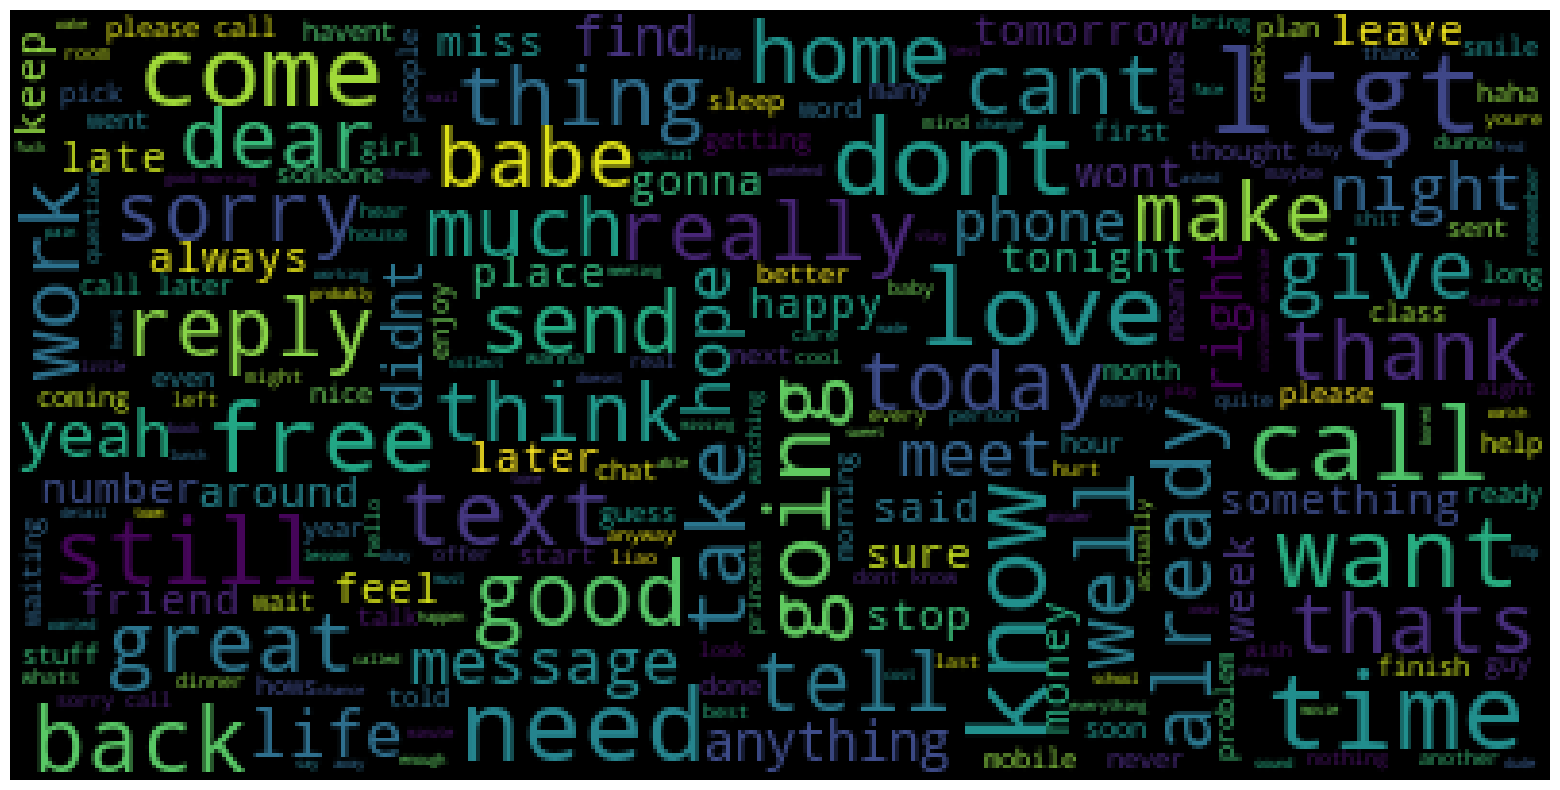

In [18]:
# Generate a basic word cloud 
from wordcloud import WordCloud, ImageColorGenerator

text = " ".join([x for x in data['clean_text']])
# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=30, max_words=1000).generate(text)

# Display the generated image:
plt.figure(figsize= [20,10])
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [19]:
# Prepare data for the model. Convert label/category in to binary

data['Category'] = [1 if x == 'spam' else 0 for x in data['Category']]
data.head()

,Category,Message,removed_punc,tokens,larger_tokens,clean_tokens,stem_words,lemma_words,clean_text
0,0,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,"[go, until, jurong, point, crazy, available, o...","[until, jurong, point, crazy, available, only,...","[jurong, point, crazy, available, bugis, great...","[jurong, point, crazi, avail, bugi, great, wor...","[jurong, point, crazy, available, bugis, great...",jurong point crazy available bugis great world...
1,0,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]",[joking],[joking],[joke],[joking],joking
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, wkly, comp, final, tkts, 21st, 2...","[free, entry, wkly, comp, final, tkts, 21st, 2...","[free, entri, wkli, comp, final, tkt, 21st, 20...","[free, entry, wkly, comp, final, tkts, 21st, 2...",free entry wkly comp final tkts 21st 2005 text...
3,0,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[early, already, then]","[early, already]","[earli, alreadi]","[early, already]",early already
4,0,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[dont, think, goes, lives, around, here, though]","[dont, think, goes, lives, around, though]","[dont, think, goe, live, around, though]","[dont, think, go, life, around, though]",dont think go life around though


In [40]:
data["Category"].value_counts()

Category
0    4825
1     747
Name: count, dtype: int64

In [20]:
# Split data in to training, testing sets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

text_train, text_test, y_train, y_test = train_test_split(data['clean_text'], data['Category'], test_size = 0.2)
print(text_train.shape)
print(text_test.shape)

(4457,)
(1115,)


### TF-IDF : Term Frequency - Inverse Document Frequency
#### The term frequency is the number of times a term occurs in a document. Inverse document frequency is an inverse function of the number of documents in which   that a given word occurs.
#### The product of these two terms gives tf-idf weight for a word in the corpus. The higher the frequency of occurrence of a word, lower is it's weight and vice-versa. This gives more weightage to rare terms in the corpus and penalizes more commonly occuring terms.
#### Other widely used vectorizer is Count vectorizer which only considers the frequency of occurrence of a word across the corpus.


In [21]:
# Convert lemmatized words to Tf-Idf feature vectors

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
X_train = tfidf.fit_transform(text_train)
X_test = tfidf.transform(text_test)
print(X_train.toarray())
print(X_train.shape)
print(X_test.toarray())
print(X_test.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(4457, 6929)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(1115, 6929)


In [23]:
# Get a few feature names in the vector
tfidf.get_feature_names_out()[-5::]

array(['zindgi', 'zoom', 'zouk', 'zyada', '〨ud'], dtype=object)

In [24]:
# 1st Model - Logistic Regression

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter = 500)
lr.fit(X_train, y_train)
print('Logistic Regression model fitted..')

pred = lr.predict(X_test)
print("Accuracy score : {}".format(accuracy_score(y_test, pred)))
print("Confusion matrix : \n {}".format(confusion_matrix(y_test, pred)))

Logistic Regression model fitted..
Accuracy score : 0.947085201793722
Confusion matrix : 
 [[972   5]
 [ 54  84]]


In [25]:
# 2nd Model - Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

print('Random Forest Classifier model fitted..')
pred = rf.predict(X_test)
print("Accuracy score : {}".format(accuracy_score(y_test, pred)))
print("Confusion matrix : \n {}".format(confusion_matrix(y_test, pred)))

Random Forest Classifier model fitted..
Accuracy score : 0.9704035874439462
Confusion matrix : 
 [[976   1]
 [ 32 106]]


In [26]:
# 3rd model - eXtreme Gradient Boosting

import xgboost
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

print('XGBoost Classifier model fitted..')
pred = xgb.predict(X_test)
print("Accuracy score : {}".format(accuracy_score(y_test, pred)))
print("Confusion matrix : \n {}".format(confusion_matrix(y_test, pred)))

XGBoost Classifier model fitted..
Accuracy score : 0.9605381165919282
Confusion matrix : 
 [[968   9]
 [ 35 103]]


In [29]:
import lightgbm
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier()
lgbm.fit(X_train, y_train)

print('LightGBM Classifier model fitted..')
pred = lgbm.predict(X_test)
print("Accuracy score : {}".format(accuracy_score(y_test, pred)))
print("Confusion matrix : \n {}".format(confusion_matrix(y_test, pred)))

[LightGBM] [Info] Number of positive: 609, number of negative: 3848
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009491 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4758
[LightGBM] [Info] Number of data points in the train set: 4457, number of used features: 274
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.136639 -> initscore=-1.843491
[LightGBM] [Info] Start training from score -1.843491
LightGBM Classifier model fitted..
Accuracy score : 0.968609865470852
Confusion matrix : 
 [[970   7]
 [ 28 110]]


In [38]:
# Assuming you have new_data in the same format as your training data
new_data = ["free entry"]

# Preprocess the new data using the same vectorizer used for training data
new_data_transformed = tfidf.transform(new_data)

# Make predictions on the new data
pred_new = lr.predict(new_data_transformed)

# Print the predictions
print(pred_new)


[1]
